In [1]:
%matplotlib inline
# Importing Some Python Modules
import warnings; warnings.simplefilter('ignore')
import scipy, itertools, pandas as pd, matplotlib.pyplot as plt, seaborn as sns, numpy as np
from scipy import stats
from sklearn.preprocessing import StandardScaler, MinMaxScaler

plt.style.use('bmh'); sns.set()

### DATA 1

In [2]:
data=pd.read_csv('us-states.csv')

In [3]:
data.tail(10)

,date,state,fips,cases,deaths
2319,2020-04-13,Tennessee,47,5483,114
2320,2020-04-13,Texas,48,14488,320
2321,2020-04-13,Utah,49,2363,18
2322,2020-04-13,Vermont,50,748,28
2323,2020-04-13,Virgin Islands,78,51,1
2324,2020-04-13,Virginia,51,5747,149
2325,2020-04-13,Washington,53,10538,525
2326,2020-04-13,West Virginia,54,638,9
2327,2020-04-13,Wisconsin,55,3428,155
2328,2020-04-13,Wyoming,56,275,1


In [4]:
N, P = data.shape
print('baris = ', N, ', Kolom = ', P)

baris =  2329 , Kolom =  5


In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2329 entries, 0 to 2328
Data columns (total 5 columns):
date      2329 non-null object
state     2329 non-null object
fips      2329 non-null int64
cases     2329 non-null int64
deaths    2329 non-null int64
dtypes: int64(3), object(2)
memory usage: 91.1+ KB


In [16]:
# dataframe types: https://pbpython.com/pandas_dtypes.html
data['date'] = data['date'].astype('datetime64')
data.dtypes

date      datetime64[ns]
state             object
fips               int64
cases              int64
deaths             int64
dtype: object

# Statistika Deskriptive

In [17]:
# Statistika Sederhana dari data "Numerik"-nya
data.describe(include='all')

,date,state,fips,cases,deaths
count,2329,2329,2329.000000,2329.000000,2329.000000
unique,84,56,NaN,NaN,NaN
top,2020-04-11 00:00:00,Washington,NaN,NaN,NaN
freq,56,84,NaN,NaN,NaN
first,2020-01-21 00:00:00,NaN,NaN,NaN,NaN
last,2020-04-13 00:00:00,NaN,NaN,NaN,NaN
mean,NaN,NaN,31.144268,2703.827823,83.946329
std,NaN,NaN,18.205201,12137.769541,497.656005
min,NaN,NaN,1.000000,0.000000,0.000000
25%,NaN,NaN,17.000000,11.000000,0.000000


In [21]:
data[['state','cases']].describe(include='all')

,state,cases
count,2329,2329.000000
unique,56,NaN
top,Washington,NaN
freq,84,NaN
mean,NaN,2703.827823
std,NaN,12137.769541
min,NaN,0.000000
25%,NaN,11.000000
50%,NaN,161.000000
75%,NaN,1154.000000


In [24]:
print(data.isnull().sum())

date      0
state     0
fips      0
cases     0
deaths    0
dtype: int64


In [25]:
#mengecek apakah ada duplikat data?
print(data.shape)
data.duplicated().sum()

(2329, 5)


0

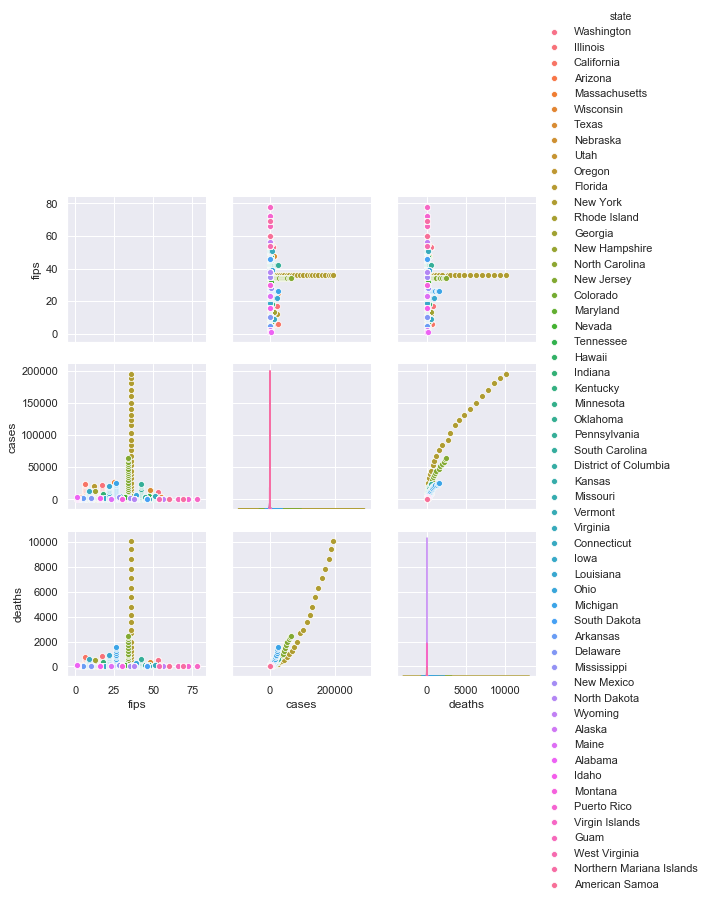

In [26]:
# Scatter Plots; https://seaborn.pydata.org/generated/seaborn.pairplot.html
p = sns.pairplot(data, hue="state")
# Warning agak lambat (variabel cukup banyak)

In [38]:
data.corr()

,fips,cases,deaths
fips,1.000000,-0.009674,-0.003351
cases,-0.009674,1.000000,0.963846
deaths,-0.003351,0.963846,1.000000


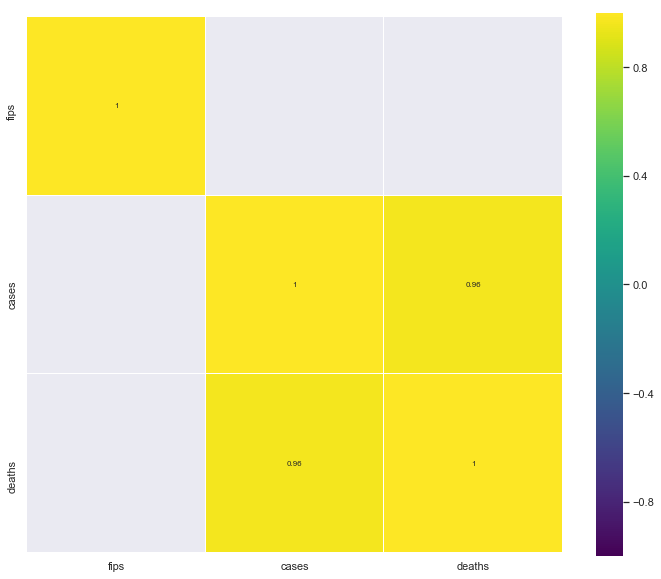

In [39]:
# HeatMap untuk menyelidiki korelasi
corr2 = data.corr() # We already examined SalePrice correlations
plt.figure(figsize=(12, 10))

sns.heatmap(corr2[(corr2 >= 0.5) | (corr2 <= -0.4)], 
            cmap='viridis', vmax=1.0, vmin=-1.0, linewidths=0.1,
            annot=True, annot_kws={"size": 8}, square=True);

### Berikut 5 teratas State dengan kasus terbanyak

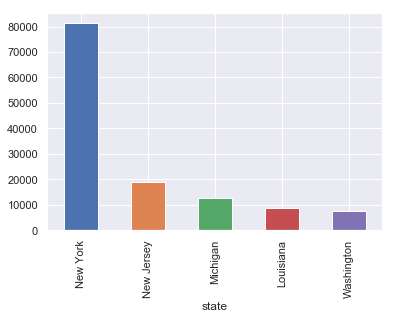

In [31]:
data.groupby('state').deaths.sum().sort_values(ascending=False).head(5).plot(kind='bar')

NewYork adalah state dengan tingkat kasus tertinggi diatas angka 80 ribu kasus

## Kasus dari setiap State

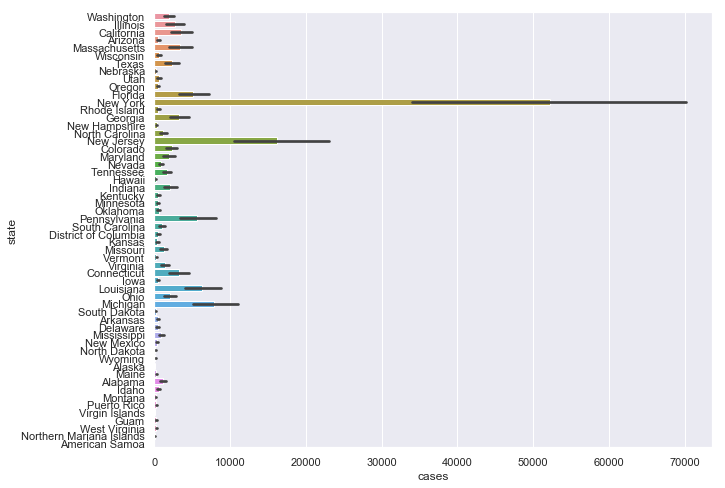

In [40]:
plt.figure(figsize=(10,8))
p=sns.barplot(x='cases', y='state',data=data)

Dapat dilihat bahwa State dengan kasus Terbanyak adalah New York

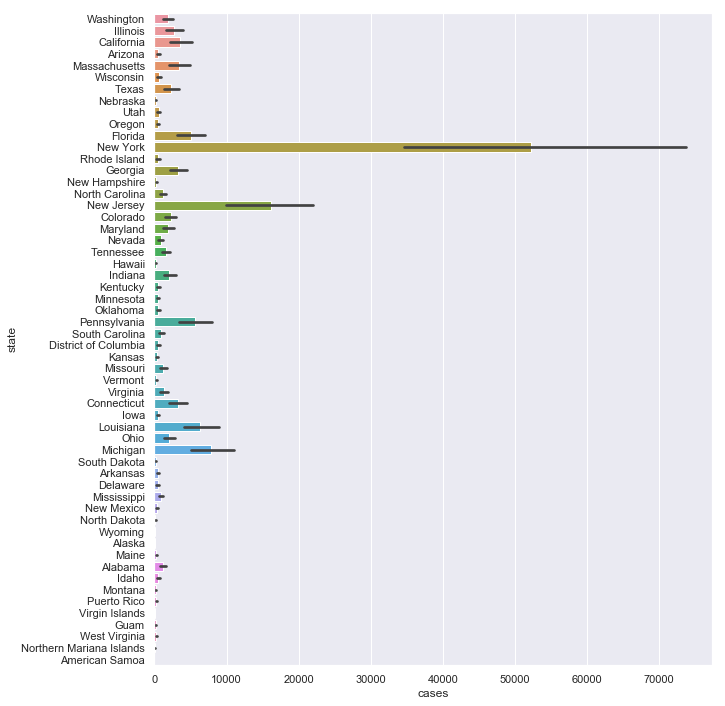

In [42]:
# Menampilkan banyaknya kasus kematian di setiap provinsi 
plt.figure(figsize=(10,12))
p=sns.barplot(x='cases', y='state',data=data)

Dapat dilihat pula bahwa New York memiliki angka kematian Tertinggi. banyaknya kasus di Newyork mempengaruhi banyaknya angka kematian di United states

Text(0.5,1,'Pertumbuhan kasus')

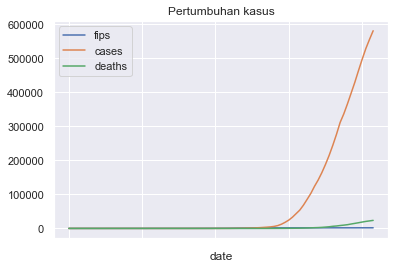

In [8]:
data.groupby('date').sum().plot()
plt.title('Pertumbuhan kasus')

Laju pertumbuhan Kasus Covid 19 mengikuti fungsi logistik ( Fungsi terhadap waktu ) dengan seolah olah fungsi y1=e^kt atau y1=e^t-T1. akan ada titik jenuh dan akan balik lagi, tidak akan mungkin pertumbuhan kasus melebihi populasi penduduk. Kasus kematian masih terlalu kecil dibanding dengan banyaknya kasus terinfeksi. Fungsi logistik naik pada hari ke sekian (3) setelah adanya kasus pertama

In [50]:
data.groupby('date').sum().describe()

,fips,cases,deaths
count,84.000000,84.000000,84.000000
mean,863.511905,74966.845238,2327.511905
std,734.751814,151761.975094,5452.786290
min,53.000000,1.000000,0.000000
25%,160.000000,13.000000,0.000000
50%,485.500000,114.500000,8.000000
75%,1693.000000,46108.750000,592.250000
max,1822.000000,580878.000000,23607.000000


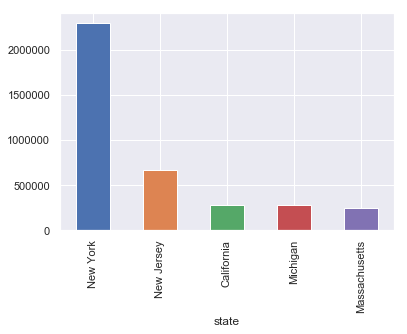

In [51]:
data1.groupby('state').cases.sum().sort_values(ascending=False).head().plot(kind='bar')

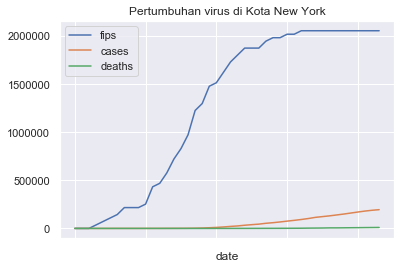

In [52]:
data1[data1['state']=='New York'].groupby('date').sum().plot()
plt.title('Pertumbuhan virus di Kota New York')
plt.show()

karena Newyork merupakan state terbanyak terinfeksi kasus 19 maka skema pertumbuhan kasus di state ini mengikuti fungsi logistik

## DATA 2

In [11]:
mortality=pd.read_csv('mortality-canda.csv')

In [12]:
mortality.head(50)

,death_id,province_death_id,case_id,age,sex,health_region,province,country,date_death_report,death_source,additional_info,additional_source
0,1,1,60.0,80-89,Male,Vancouver Coastal,BC,Canada,2020-03-08,https://news.gov.bc.ca/releases/2020HLTH0068-0...,Lynn Valley Resident,NaN
1,2,1,477.0,70-79,Male,Simcoe Muskoka,Ontario,Canada,2020-03-11,https://www.nationalobserver.com/2020/03/17/ne...,Was being treated at Royal Victoria Regional H...,NaN
2,3,2,NaN,Not Reported,Not Reported,Vancouver Coastal,BC,Canada,2020-03-16,https://news.gov.bc.ca/releases/2020HLTH0086-0...,Lynn Valley Resident,NaN
3,4,3,NaN,Not Reported,Not Reported,Vancouver Coastal,BC,Canada,2020-03-16,https://news.gov.bc.ca/releases/2020HLTH0086-0...,Lynn Valley Resident,NaN
4,5,4,NaN,Not Reported,Not Reported,Vancouver Coastal,BC,Canada,2020-03-16,https://news.gov.bc.ca/releases/2020HLTH0086-0...,Lynn Valley Resident,NaN
5,6,5,NaN,Not Reported,Not Reported,Vancouver Coastal,BC,Canada,2020-03-17,https://vancouverisland.ctvnews.ca/b-c-declare...,Lynn Valley Resident,NaN
6,7,6,NaN,Not Reported,Not Reported,Vancouver Coastal,BC,Canada,2020-03-17,https://vancouverisland.ctvnews.ca/b-c-declare...,Lynn Valley Resident,NaN
7,8,7,NaN,80-89,Male,Fraser,BC,Canada,2020-03-17,https://vancouverisland.ctvnews.ca/b-c-declare...,The other death is a man in his 80s in the Fra...,NaN
8,9,1,NaN,82,Female,Lanaudière,Quebec,Canada,2020-03-18,https://montreal.ctvnews.ca/covid-19-quebec-ha...,Lived in senior's residence. Close contact wit...,https://globalnews.ca/news/6705211/granddaught...
9,10,2,806.0,50-59,Male,Halton,Ontario,Canada,2020-03-19,https://www.halton.ca/The-Region/News/2020/Hal...,NaN,https://globalnews.ca/news/6701911/coronavirus...


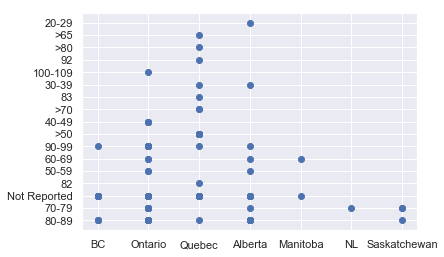

In [13]:
plt.scatter(mortality['province'],mortality['age'])

Dapat dilihat berdasarkan pola tersebut, rentang umur 80-89 yang paling banyak tingkat kematiannya.

### Berikut ini 5 provinsi teratas yang paling banyak kasus

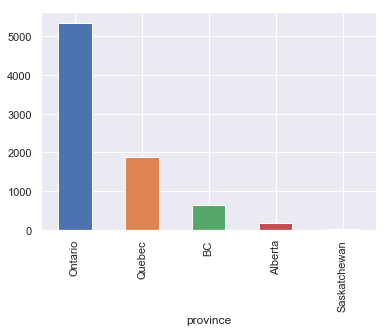

In [14]:
mortality.groupby('province').province_death_id.sum().sort_values(ascending=False).head(5).plot(kind='bar')

### Berikut ini dapat dilihat banyaknya kasus di tiap provinsi, dengan yang tertinggi di provinsi Ontario


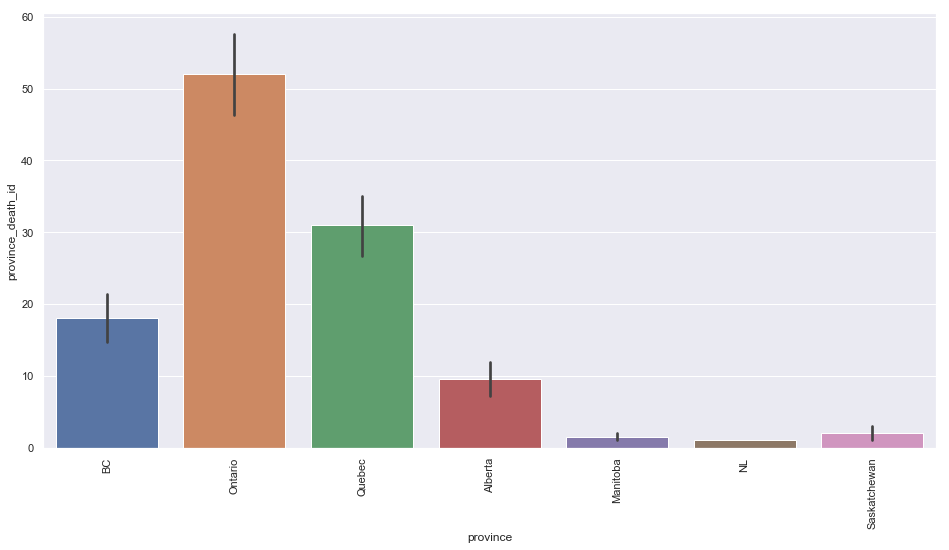

In [15]:
plt.figure(figsize=(16,8))
ax = sns.barplot(x="province", y="province_death_id", data=mortality)
ax.set_xticklabels(ax.get_xticklabels(), rotation=90)
print()

## Berikut ini laporan harian data kasus perhari 

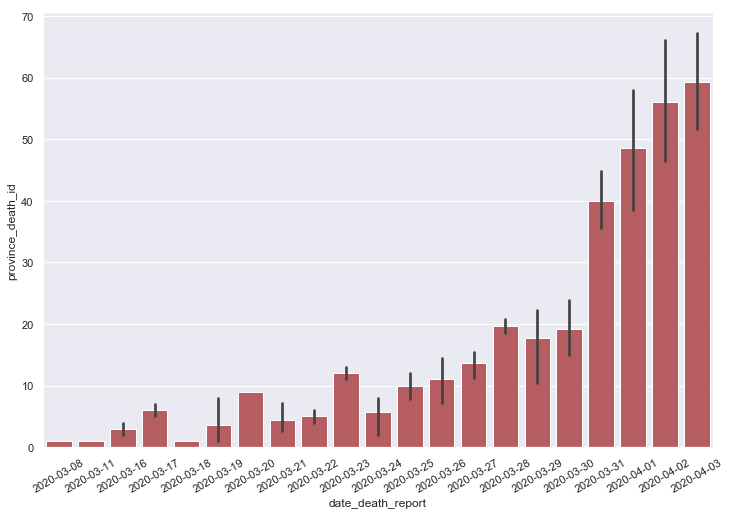

In [16]:
plt.figure(figsize=(12,8))
ax = sns.barplot(x="date_death_report", y="province_death_id", data=mortality, color="r")
ax.set_xticklabels(ax.get_xticklabels(), rotation=30)
print()

Berdasarkan Histogram data perhari, dapat dilihat bahwa kasus terus bertambah, bahkan naik signifikan akhir data tersebut

### DATA 3

In [17]:
kasus=pd.read_csv('cases-canada.csv')

In [18]:
kasus.head(50)

,case_id,provincial_case_id,age,sex,health_region,province,country,date_report,report_week,travel_yn,travel_history_country,locally_acquired,case_source,additional_info,additional_source,method_note
0,1,1,50-59,Male,Toronto,Ontario,Canada,2020-01-25,2020-01-19,1,China,NaN,(1) https://news.ontario.ca/mohltc/en/2020/01/...,NaN,NaN,0.0
1,2,2,50-59,Female,Toronto,Ontario,Canada,2020-01-27,2020-01-26,1,China,NaN,(1) https://news.ontario.ca/mohltc/en/2020/01/...,Travel and Close Contact,NaN,0.0
2,3,1,40-49,Male,Vancouver Coastal,BC,Canada,2020-01-28,2020-01-26,1,China,NaN,https://news.gov.bc.ca/releases/2020HLTH0015-0...,NaN,NaN,NaN
3,4,3,20-29,Female,Middlesex-London,Ontario,Canada,2020-01-31,2020-01-26,1,China,NaN,(1) https://news.ontario.ca/mohltc/en/2020/01/...,NaN,NaN,0.0
4,5,2,50-59,Female,Vancouver Coastal,BC,Canada,2020-02-04,2020-02-02,0,NaN,Close Contact,https://news.gov.bc.ca/releases/2020HLTH0023-0...,The individual had close contact with family v...,NaN,NaN
5,6,3,30-39,Male,Vancouver Coastal,BC,Canada,2020-02-06,2020-02-02,1,China,NaN,https://news.gov.bc.ca/releases/2020HLTH0025-0...,NaN,NaN,NaN
6,7,4,30-39,Female,Vancouver Coastal,BC,Canada,2020-02-06,2020-02-02,1,China,NaN,https://news.gov.bc.ca/releases/2020HLTH0025-0...,NaN,NaN,NaN
7,8,5,30-39,Female,Interior,BC,Canada,2020-02-14,2020-02-09,1,China,NaN,(1) https://news.gov.bc.ca/releases/2020HLTH00...,NaN,NaN,NaN
8,9,6,30-39,Female,Fraser,BC,Canada,2020-02-20,2020-02-16,1,Iran,NaN,(1) https://news.gov.bc.ca/releases/2020HLTH00...,NaN,NaN,NaN
9,10,4,20-29,Female,Toronto,Ontario,Canada,2020-02-23,2020-02-23,1,China,NaN,(1) https://news.ontario.ca/mohltc/en/2020/02/...,NaN,NaN,0.0


In [20]:
kasus.columns

Index(['case_id', 'provincial_case_id', 'age', 'sex', 'health_region',
       'province', 'country', 'date_report', 'report_week', 'travel_yn',
       'travel_history_country', 'locally_acquired', 'case_source',
       'additional_info', 'additional_source', 'method_note'],
      dtype='object')

## Berikut ini scatter plot rentang umur di tiap provinsi

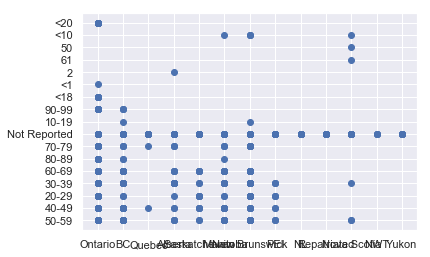

In [21]:
plt.scatter(kasus['province'],kasus['age'])

Dapat dilihat berdasarkan pola tersebut, rentang umur 30-39 sampai 50-59 yang paling banyak terinfeksi.

## Berikut ini 5 provinsi teratas yang paling banyak kasus

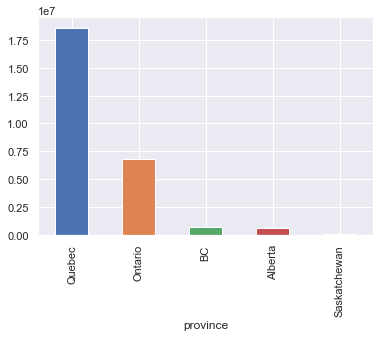

In [22]:
kasus.groupby('province').provincial_case_id.sum().sort_values(ascending=False).head(5).plot(kind='bar')

## Berikut ini dapat dilihat banyaknya kasus di tiap provinsi, dengan yang tertinggi di provinsi Quebec

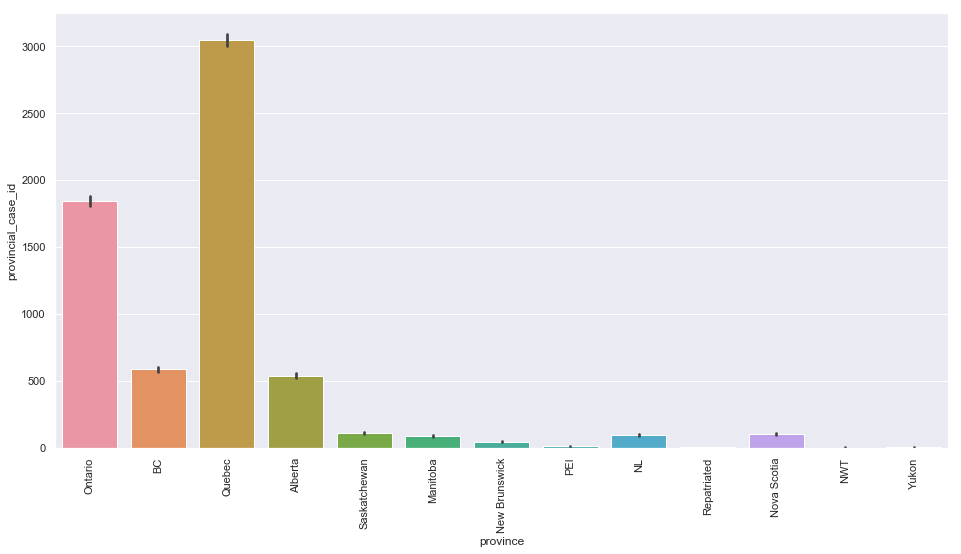

In [23]:
plt.figure(figsize=(16,8))
ax = sns.barplot(x="province", y="provincial_case_id", data=kasus)
ax.set_xticklabels(ax.get_xticklabels(), rotation=90)
print()

## Berikut ini laporan harian data kasus perhari 

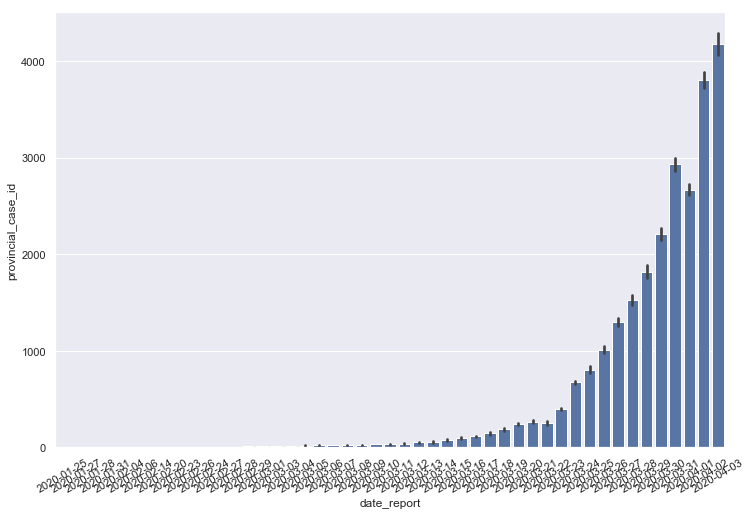

In [24]:
plt.figure(figsize=(12,8))
ax = sns.barplot(x="date_report", y="provincial_case_id", data=kasus, color="b")
ax.set_xticklabels(ax.get_xticklabels(), rotation=30)
print()